<a href="https://colab.research.google.com/github/nc369/fft/blob/main/fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cmath as cm
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def e(m, N):
    "calculates e^(2pi * i*m/N)"
    return np.around(cm.exp((2*np.pi*complex(0,1)*m)/N),10)
v_e = np.vectorize(e)

def W(N):
    "dft matrix of size n"
    return np.around( np.fromfunction(lambda i,j: np.conjugate( v_e(i*j,N) ), (N,N), dtype=complex), 10)

def inv_W(N):
    "idft matrix of size n"
    return np.around(np.conjugate(W(N))/N , 10)

In [ ]:
def fft(vector):
    "fast fourier transform of a  vector"

    if type(vector)!=np.ndarray:
        vector=np.array(vector)

    N = vector.shape[0] #dimension of vector
    if N % 2==0:
        M=N/2
        fac = np.conjugate(v_e(np.arange(M),N)) # e^(2pi * m/N) for each m in 0,1,...,M-1
        even = fft( vector[0::2] ) # fft of even coordinates
        odd = fft(vector[1::2] )  # fft of odd coordinates
        top = even + fac*odd
        bottom = even - fac*odd
        return np.concatenate((top,bottom))  #computing fft of the original vector
    else:
        return  W(N) @ vector

In [ ]:
def inv_fft(vector):
    "inverse fast fourier transform of a column vector"
    if type(vector)!=np.ndarray:
        vector=np.array(vector)

    N = vector.shape[0] #dimension of vector
    if N % 2==0:
        M=N/2
        fac = v_e(np.arange(M),N)
        even = inv_fft( vector[0::2])     #inv fft of even coord
        odd = inv_fft( vector[1::2] )  #inv fft of odd coord
        top = even + fac*odd
        bottom = even - fac*odd
        return np.concatenate((top,bottom))/2    # inv fft of the vec
    else:
        return inv_W(N) @ vector

In [ ]:
dt=1/1024
s_fr=2*np.pi*np.array([50,140,80]) #sin frequencies
c_fr=2*np.pi*np.array([30,100]) #cos frequencies
s_fr=s_fr.reshape((-1,1))
c_fr=c_fr.reshape((-1,1))
t = np.arange(0,1,dt)
f_clean = np.sum(np.sin(s_fr*t),axis=0) + np.sum(np.sin(c_fr*t),axis=0)
f = f_clean + 2*np.random.randn(len(t))

In [ ]:
n=len(t)
f_hat = fft(f)
psd = f_hat * np.conj(f_hat)/n  # computing power spectral densities
freq = (1/(dt*n))*np.arange(n)  # frequencies bin = sampling frequencies / no of samples
L= np.arange(1,n//2,dtype=int)  # frequency range till nyquist limit

In [ ]:
indices = psd>1e2
H=indices*f_hat #denoised data
den=inv_fft(H) # denoised data
den=den.real   # real part of denoised data as the imaginary parts are negligible

In [ ]:
w = {}
frqs = np.nonzero(indices)[0]
l = len(frqs)//2
frqs = frqs[:l]
w['frequency']=frqs
w['amplitude']=[2 * abs(f_hat[i])/n for i in frqs]
w['phase']=[cm.phase(f_hat[i]) for i in frqs]
print(pd.DataFrame(w))

   frequency  amplitude     phase
0         30   0.789556 -1.557709
1         50   1.041724 -1.485455
2         80   1.084847 -1.627082
3        100   1.017423 -1.683672
4        140   1.023428 -1.602389


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


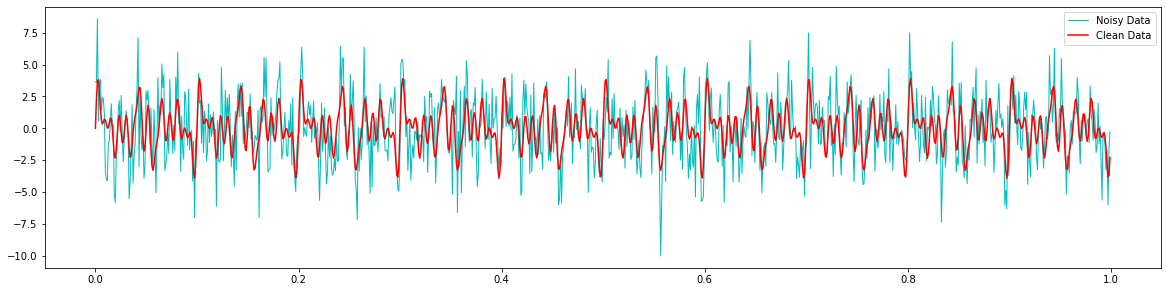

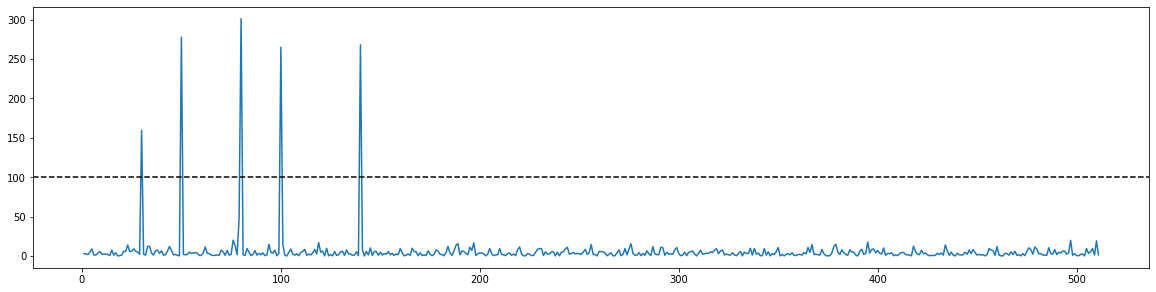

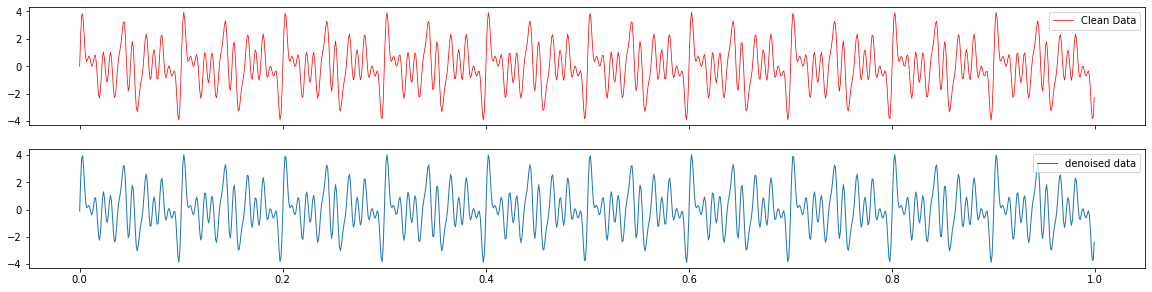

In [ ]:
plt.figure(figsize=(20,4.8))
plt.plot(t,f,Linewidth=1,color='c', label='Noisy Data')
plt.plot(t,f_clean,Linewidth=1.5,color='r', label='Clean Data')
plt.legend()

plt.figure(figsize=(20,4.8))
plt.plot(freq[L],psd[L])                    #psd plot till nyquist limit
plt.axhline(100,ls='--',c='black')

fig, axs = plt.subplots(2,figsize=(20,4.8))
axs[1].plot(t,den,Linewidth=1,label='denoised data')
axs[0].plot(t,f_clean,Linewidth=.75,color='r', label='Clean Data')
axs[0].legend()
axs[1].legend()
for ax in fig.get_axes():
    ax.label_outer()